# Training the Model

In this notebook we will train our three models `Logistic Regression, Decision Tree and Random Forest`, and compare the accuracy to decide which model is the best for our data to classify the customer response.


#### To train my models, I will be using:
1. Cross validation method to get the best training data to avoid over and under fitting.
2. Grid search for parameter selection and comparing accuricies of different hyper-parameters and to select the best parameter for each model.



In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', None)

#### Features and target data download

In [2]:
directory = 'uploaded_data'
train_data = pd.read_csv(os.path.join(directory, 'train.csv'), header=None)
X_train = train_data.iloc[:, :-1].values #all until last column
Y_train = train_data.iloc[:, -1].values #only last column

test_data = pd.read_csv(os.path.join(directory, 'test.csv'), header=None)
X_test = test_data.iloc[:, :-1].values #all until last column
Y_test = test_data.iloc[:, -1].values #only last column

### Logisitic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

I will split the data into 4 folds, cross_val_score will divide them into 3 training sets and 1 testing set, so the test is 25% of the training data set, which is 20% of the total data.

In [4]:
#Cross Validation scores on 4 folds 
lr = LogisticRegression()
scores_arr = cross_val_score(lr,X_train,Y_train,cv=4,n_jobs=-1)
display(scores_arr)
print("Accuracy: %.2f%%" % (scores_arr.mean()*100.0))

array([0.743866  , 0.75181094, 0.75679102, 0.75552336])

Accuracy: 75.20%


In [5]:
#Grid search to find the best parameters to fit to maximize the cross validation scores
gridsearch_param = {
    'C': [0.1,1,10,100],
    'max_iter' : [50,100,1000,10000],
}

gsv_lr = GridSearchCV(estimator=lr,param_grid=gridsearch_param,\
                   cv=4, n_jobs=-1,scoring ='accuracy')

lr_model = gsv_lr.fit(X_train,Y_train)

best_lr_parameters = gsv_lr.best_params_
best_lr_score = gsv_lr.best_score_
best_lr_estimator = gsv_lr.best_estimator_

print('LR best parameter:',best_lr_parameters)
print("LR best score: %.2f%%" % (best_lr_score*100.0))
print('LR best estimator:',best_lr_estimator)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR best parameter: {'C': 1, 'max_iter': 50}
LR best score: 75.20%
LR best estimator: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


### Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
scores_arr = cross_val_score(dtc,X_train,Y_train,cv=4,n_jobs=-1)
display(scores_arr)
print("Min Accuracy: %.2f%%" % (scores_arr.mean()*100.0))

array([0.75002263, 0.75316914, 0.76014125, 0.75715321])

Min Accuracy: 75.51%


In [7]:
#Grid search to find the best parameters to fit to maximize the cross validation scores
gridsearch_param = {
    'max_depth': [4,6,8,9,10,20],
    'splitter' : ['best', 'random'],
    'min_samples_split' : np.arange(3, 15),
    'criterion' : ['gini', 'entropy']
}

gsv_dt = GridSearchCV(estimator=dtc,param_grid=gridsearch_param,\
                   cv=4, n_jobs=-1)

dt_model = gsv_dt.fit(X_train,Y_train)


best_dt_parameters = gsv_dt.best_params_
best_dt_score = gsv_dt.best_score_
best_dt_estimator = gsv_dt.best_estimator_

print('DT best parameter:',best_dt_parameters)
print("DT best score: %.2f%%" % (best_dt_score*100.0))
print('DT best estimator:',best_dt_estimator)

DT best parameter: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 3, 'splitter': 'best'}
DT best score: 77.27%
DT best estimator: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


### Random forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
scores_arr = cross_val_score(rf,X_train,Y_train,cv=4,n_jobs=-1)
display(scores_arr)
print("Min Accuracy: %.2f%%" % (scores_arr.mean()*100.0))

array([0.75382526, 0.7559761 , 0.76095618, 0.76331039])

Min Accuracy: 75.85%


In [9]:
#Grid search to find the best parameters to fit to maximize the cross validation scores
gridsearch_param = {
    'max_depth': [4,6,8,10,12],
    'n_estimators' : [20,50,100,200],
    'min_samples_split' : np.arange(3, 15),
    'criterion' : ['gini', 'entropy']
}

gsv_rf = GridSearchCV(estimator=rf,param_grid=gridsearch_param,\
                   cv=4, n_jobs=-1)

rf_model = gsv_rf.fit(X_train,Y_train)


best_rf_parameters = gsv_rf.best_params_
best_rf_score = gsv_rf.best_score_
best_rf_estimator = gsv_rf.best_estimator_

print('RF best parameter:',best_rf_parameters)
print("RF best score: %.2f%%" % (best_rf_score*100.0))
print('RF best estimator:',best_rf_estimator)

RF best parameter: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 9, 'n_estimators': 100}
RF best score: 77.38%
RF best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


## Benchmark

My benchmark for evaluating the models is an accuracy of at least 75% and a low percentage of FN as we don't need to predict that a customer may not respond to an offer while he will actually do respond.

### Models saving and loading using pickle

In [10]:
import pickle

#save to file
with open('Logisticregression.pkl', 'wb') as file:
    pickle.dump(lr_model, file)
    
with open('DecisionTree.pkl', 'wb') as file:
    pickle.dump(dt_model, file)
    
with open('RandomForest.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [11]:
# Load from file
with open('Logisticregression.pkl', 'rb') as file:
    lr_trained_model = pickle.load(file)
    
with open('DecisionTree.pkl', 'rb') as file:
    dt_trained_model = pickle.load(file)
    
with open('RandomForest.pkl', 'rb') as file:
    rf_trained_model = pickle.load(file)

####  After loading the models, it's time to test each model and see check testing scores

In [12]:
# Calculate the  score and predict the targets for all three trianed models
lr_score = lr_trained_model.score(X_test, Y_test)
print("LR Test score: {0:.2f} %".format(100 * lr_score))
lr_Y_predict = lr_trained_model.predict(X_test)

dt_score = dt_trained_model.score(X_test, Y_test)
print("DT Test score: {0:.2f} %".format(100 * dt_score))
dt_Y_predict = dt_trained_model.predict(X_test)

rf_score = rf_trained_model.score(X_test, Y_test)
print("RF Test score: {0:.2f} %".format(100 * rf_score))
rf_Y_predict = rf_trained_model.predict(X_test)


LR Test score: 75.57 %
DT Test score: 77.19 %
RF Test score: 77.34 %


### Evaluation Metrics

#### We will use sklearn.metrics to help evaluating the three models and compare the results using:
* Accuracy
* Confusion matrix, as we want to select the model with highest TP and lowest FN count
* Recall
* Precision

In [13]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

# Calculate the metrics
def model_eval(y_test,y_predicted):
    accuracy = metrics.accuracy_score(y_test, y_predicted)
    conf_matrix = metrics.confusion_matrix(y_test, y_predicted)
    precision = metrics.precision_score(y_test, y_predicted)
    recall = metrics.recall_score(y_test, y_predicted)
    return accuracy,conf_matrix,precision,recall


In [14]:
lr_acc,lr_conf,lr_prec,lr_rec = model_eval(Y_test,lr_Y_predict)
dt_acc,dt_conf,dt_prec,dt_rec = model_eval(Y_test,dt_Y_predict)
rf_acc,rf_conf,rf_prec,rf_rec = model_eval(Y_test,rf_Y_predict)

In [15]:
#Compare the results in one dataframe
model_comp_df = pd.DataFrame(
    [[f'{lr_acc*100:.2f}%', lr_prec, lr_rec], 
    [f'{dt_acc*100:.2f}%', dt_prec, dt_rec],
    [f'{rf_acc*100:.2f}%', rf_prec, rf_rec]],
    columns=['Accuracy %', 'Precision', 'Recall'],
    index=['Logistic Regression','Decision Tree','Random Forest'])

pd.set_option('display.precision', 4)
display(model_comp_df)

,Accuracy %,Precision,Recall
Logistic Regression,75.57%,0.7166,0.8534
Decision Tree,77.19%,0.7495,0.8233
Random Forest,77.34%,0.7352,0.8611


In [16]:
#confusion matrix construction

def conf_matrix(con_matrix, ax):
    ax.matshow(con_matrix, cmap='BuGn')
    ax.set_xlabel('Confusion Matrix')
    ax.text(0, 0, f'TP\n{con_matrix[1,1]}',
            ha="center", va="center", color="w")
    ax.text(0, 1, f'FP\n{con_matrix[0,1]}',
            ha="center", va="center", color="k")
    ax.text(1, 0, f'FN\n{con_matrix[1,0]}',
            ha="center", va="center", color="k")
    ax.text(1, 1,f'TN\n{con_matrix[0,0] }',
            ha="center", va="center", color="w")

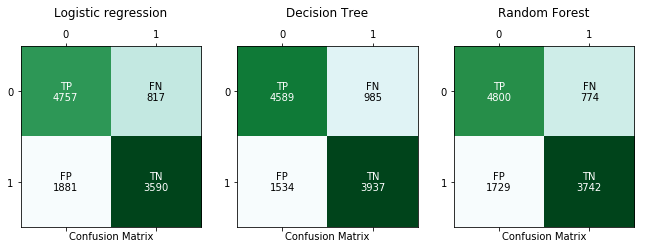

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=3)

conf_matrix(lr_conf, axs[0]) 
axs[0].set_title('Logistic regression\n')

conf_matrix(dt_conf, axs[1])
axs[1].set_title('Decision Tree\n')

conf_matrix(rf_conf, axs[2])
axs[2].set_title('Random Forest\n')

fig.set_size_inches(11,8)
plt.show()

#### The confusion matrix shows that the random forest has the highest accuracy 77.3% and TP count 4800 and the lowest FN count 774.

### Model refinement 

Since the highest accuracy belongs to the Random forest model, we will take this model and apply some refinement on by changing the hyperparameters and check if we can get a higher accuracy or not.

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_refined= RandomForestClassifier()
scores_arr = cross_val_score(rf_refined,X_train,Y_train,cv=4,n_jobs=-1)
display(scores_arr)
print("Min Accuracy: %.2f%%" % (scores_arr.mean()*100.0))

array([0.75255772, 0.75325969, 0.76005071, 0.76294821])

Min Accuracy: 75.72%


In [19]:
#Grid search to find the best parameters to fit to maximize the cross validation scores
gridsearch_param = {
    'max_depth': [14,16,18,20],
    'n_estimators' : [250,300,350,400],
    'min_samples_split' : np.arange(14,15,16),
    'criterion' : ['gini', 'entropy']
}

gsv_rf_refined = GridSearchCV(estimator=rf_refined,param_grid=gridsearch_param,\
                   cv=4, n_jobs=-1)

rf_model_refined = gsv_rf_refined.fit(X_train,Y_train)


best_rf_refined_parameters = gsv_rf_refined.best_params_
best_rf_refined_score = gsv_rf_refined.best_score_
best_rf_refined_estimator = gsv_rf_refined.best_estimator_

print('RF best parameter:',best_rf_refined_parameters)
print("RF best score: %.2f%%" % (best_rf_refined_score*100.0))
print('RF best estimator:',best_rf_refined_estimator)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RF best parameter: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 14, 'n_estimators': 250}
RF best score: 77.10%
RF best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=14,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


#### The trained first Random Forest model had better accuracy than the refined one, and since the Gridsearch technique applys all iterations given, we can give it another try by reducing the values of the hyperparameters instead of increasing them.

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_refined1= RandomForestClassifier()
scores_arr = cross_val_score(rf_refined1,X_train,Y_train,cv=4,n_jobs=-1)
display(scores_arr)
print("Min Accuracy: %.2f%%" % (scores_arr.mean()*100.0))

array([0.75237664, 0.75706266, 0.76439696, 0.76376313])

Min Accuracy: 75.94%


In [21]:
#Grid search to find the best parameters to fit to maximize the cross validation scores
gridsearch_param = {
    'max_depth': [8,9],
    'n_estimators' : [10,20,30],
    'min_samples_split' : np.arange(4,5,6),
    'criterion' : ['gini', 'entropy']
}

gsv_rf_refined1 = GridSearchCV(estimator=rf_refined1,param_grid=gridsearch_param,\
                   cv=4, n_jobs=-1)

rf_model_refined1 = gsv_rf_refined1.fit(X_train,Y_train)


best_rf_refined_param = gsv_rf_refined1.best_params_
best_rf_refined_sc = gsv_rf_refined1.best_score_
best_rf_refined_est = gsv_rf_refined1.best_estimator_

print('RF best parameter:',best_rf_refined_param)
print("RF best score: %.2f%%" % (best_rf_refined_sc*100.0))
print('RF best estimator:',best_rf_refined_est)

RF best parameter: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 20}
RF best score: 77.15%
RF best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


#### Still the 1st trained Random Forest model has the highest accuracy, so no more refinement needed.

### Conclusion

In this project I addressed the problem of not all customers respond to the offers sent by merchants the same way.Some customers don’t view the offers because they are not interested, others may be not interested in that particular offer they received. 
My model will predict and identify whether the customer will respond and complete these offers or not.

First, I downloaded the datasets and explored each of them and started to eliminate some of the non-related features and to normalize other features that has non-numeric values in order to be able to feed the models with more meaningful data.
After that I merged the three datasets into one grouped by customers that simply illustrate the relation between the customer demographic data, his/her previous transactions and reponses to offers and the offers discriptive data.

I chose to train 3 models for this binary classification problem: Logisctic Regression, Decision tree and Random Forest.

I chose to use the Cross Validation for training and splitting my data to choose the best folds to train, which helped in improving the training/learning accuracy of my models.
Then, I decided to work with Grid search to find the best model hyperparameters which also helped in improving the accuracy of my models, it saved me a lot of time and gave me a clear view of the best hyperparameters to use.

The Random Forest model performed the best with a testing accuracy of 77.34% and a very small FN percentage of 16%.

As an improvement to the model, I can only think of other features that may help in training the model, for example: we can create features that describe the frequency of the customer visits to Starbucks in a month and another feature to describe the payment method (cash/CC).





